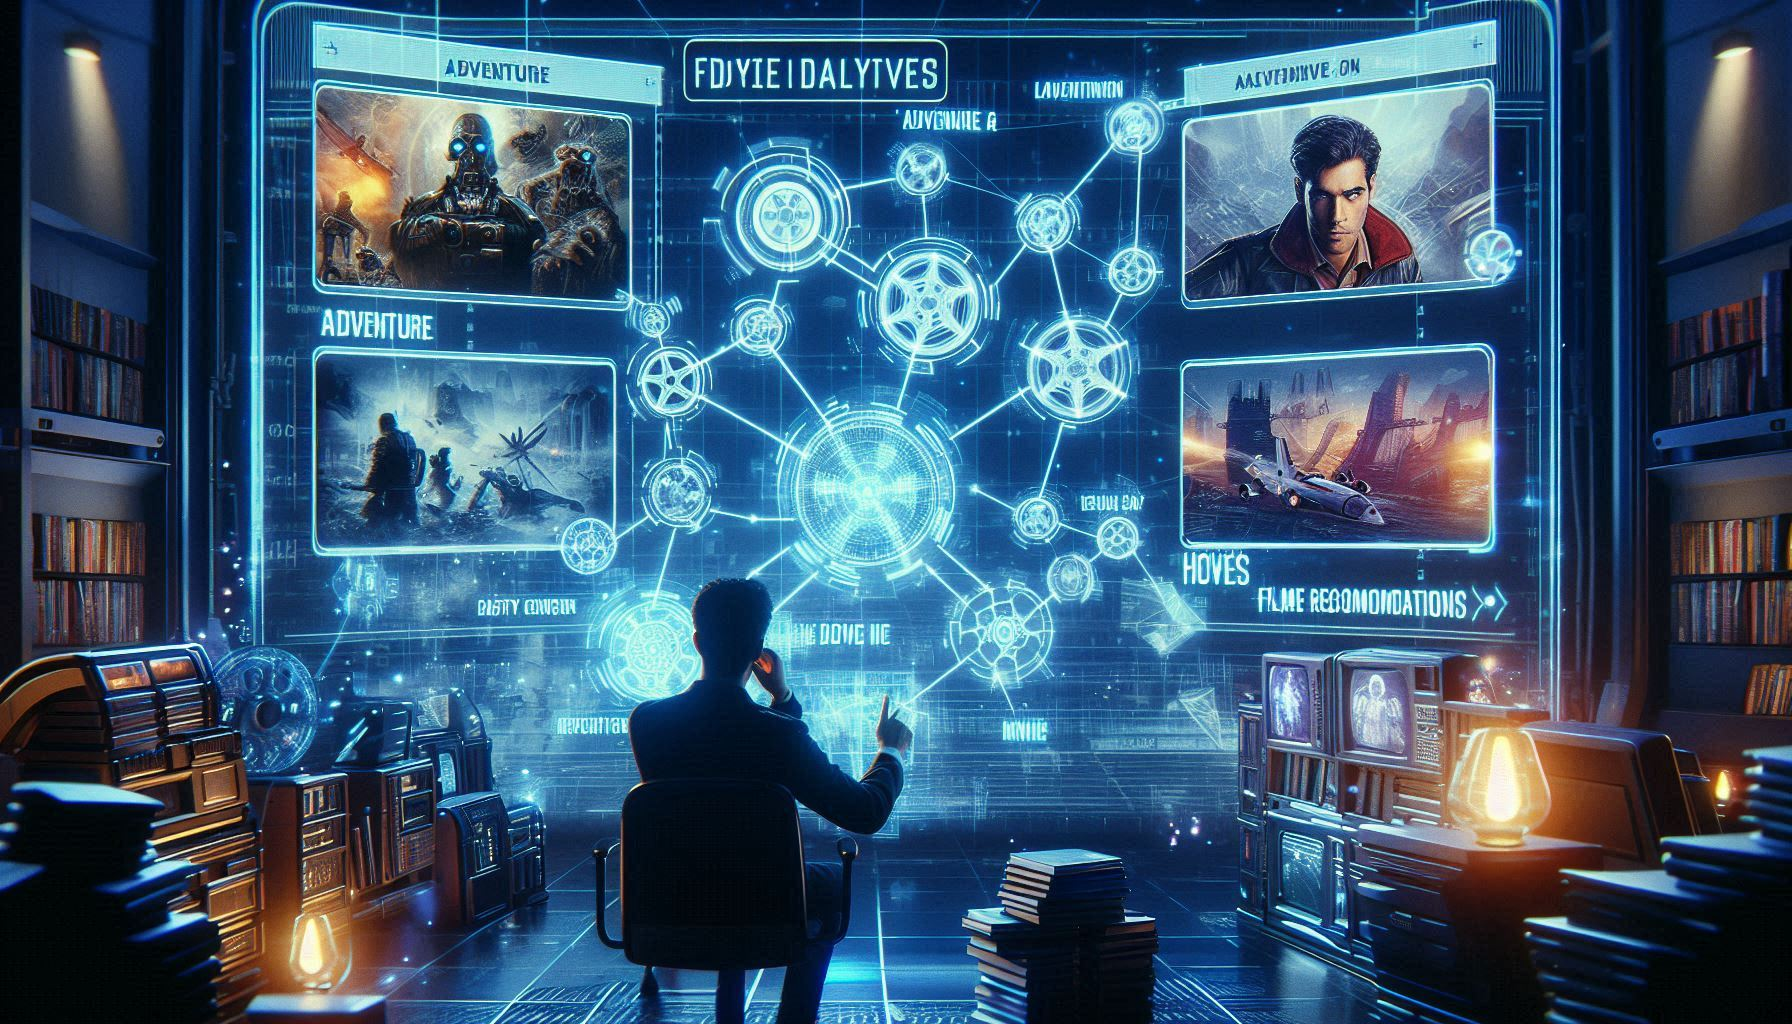

In [156]:
Image(filename='imagem.jpeg')

## Análise de recomendação de filmes, nesse desafio é necessário responder às seguintes perguntas:

#### a) Dado um filme FM que um respectivo usuário gostou, quais 10 títulos de filmes você pode recomendá-lo?

#### b) Considerando o conceito da galinha dos ovos de ouro, diga quais são os 4 filmes que apresentam maior correlação com todos os outros, a partir da lista de filmes correlacionados a FM selecionado pelo usuário?

### Etapa de Análise Exploratória de Dados (EDA)

In [6]:
import pandas as pd
import matplotlib as plt

Primeira tabela 'idfilmestitulos.txt'

In [63]:
df1 = pd.read_csv("idfilmestitulos.txt")

In [64]:
df1['item_id'].max() #valor máximo da coluna item_id para conferência com a outra tabela

1682

In [65]:
df1.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   item_id  1682 non-null   int64 
 1   title    1682 non-null   object
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


Segunda tabela 'filmesranking.txt'

In [67]:
df2 = pd.read_csv("filmesranking.txt", sep="\t", header=None) #a tabela não tinha cabeçalhos, foi necessário a inclusão

In [68]:
df2.columns=['user_id','item_id','rating','timestamp']

In [69]:
df2.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [70]:
df2['item_id'].max() #valor máximo da coluna item_id para conferência com a outra tabela

1682

In [71]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100003 non-null  int64
 1   item_id    100003 non-null  int64
 2   rating     100003 non-null  int64
 3   timestamp  100003 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


### Processo de correlação entre as tabelas

Para correlacionar os dados, primeiro precisamos uni-los com uma chave comum, que nesse caso é a coluna 'item_id' (id do filme)

****Nessa etapa percebi que deveria criar uma variável para cada conjunto de dados, logo renomeei os Data Frames como df1 para 'idfilmestitulos.txt' e df2 para 'filmesranking.txt'****

In [82]:
df_merged=pd.merge(df1,df2,on='item_id',how='inner') #lembra um 'join' do SQL

In [83]:
df_merged.head()

,item_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324


Calcular a correlação, lembrando que é considerada apenas valores com números

In [85]:
corr_matrix=df_merged.select_dtypes(include=['number']).corr()

In [86]:
corr_matrix

,item_id,user_id,rating,timestamp
item_id,1.000000,0.010425,-0.189119,0.041878
user_id,0.010425,1.000000,-0.009377,0.019103
rating,-0.189119,-0.009377,1.000000,-0.012004
timestamp,0.041878,0.019103,-0.012004,1.000000


Essa correlação não é uma análise objetiva do que queremos como resultado

Calculando a similaridade entre os filmes com base nas avaliações dos usuários

In [89]:
ratings_matrix=df_merged.pivot_table(index='user_id',columns='item_id',values='rating')

Nessa etapa, é necessário escolher um item_id para calcular a correlação desse filme com os demais. No entanto, é importante considerar a quantidade de avaliações que cada filme recebeu, evitando incluir filmes com poucas avaliações, pois isso pode comprometer a análise.

In [97]:
cont_av=df_merged.groupby('item_id')['rating'].count()

In [100]:
cont_av.sort_values(ascending=False)

item_id
50      584
258     509
100     508
181     507
294     485
       ... 
1576      1
1577      1
1348      1
1579      1
1682      1
Name: rating, Length: 1682, dtype: int64

In [102]:
df_merged.loc[df_merged['item_id']==50,'title'].values[0] #localizando o nome do filme que possui o 'item_id' == 50

'Star Wars (1977)'

Filme escolhido para calcular a similaridade com os outros 'Star Wars (1977)'

In [103]:
filme_fm=50

In [113]:
ratings_matrix.isna().sum().sum() #total de valores NaNs

1487805

In [117]:
rating_matrix=ratings_matrix.apply(lambda x: x.fillna(x.mean()),axis=1)

In [118]:
filme_id=50

In [127]:
# Verifica se ainda há valores nulos
ratings_matrix.isna().sum().sum()

# Preencher NaNs com zero 
ratings_matrix = ratings_matrix.fillna(0)  


In [132]:
# Criando um DataFrame com as informações finais da correlação com o filme Star Wars
similares_df = pd.DataFrame(similaridade_filmes, columns=["Correlação"])

# Remover valores NaN (caso ainda existam)
similares_df.dropna(inplace=True)

# Ordenar os filmes mais parecidos e exibir os 10 mais similares
top_filmes = similares_df.sort_values("Correlação", ascending=False).head(10)

print(top_filmes)


         Correlação
item_id            
50         1.000000
181        0.746797
172        0.555233
174        0.540455
210        0.467523
1          0.456219
195        0.437866
204        0.419493
183        0.412516
173        0.411505


In [134]:
top_filmes=top_filmes.merge(df1,left_index=True,right_on='item_id')

In [135]:
top_filmes=top_filmes[['title','item_id','Correlação']]

In [136]:
print(top_filmes)

                                         title  item_id  Correlação
49                            Star Wars (1977)       50    1.000000
180                  Return of the Jedi (1983)      181    0.746797
171            Empire Strikes Back, The (1980)      172    0.555233
173             Raiders of the Lost Ark (1981)      174    0.540455
209  Indiana Jones and the Last Crusade (1989)      210    0.467523
0                             Toy Story (1995)        1    0.456219
194                     Terminator, The (1984)      195    0.437866
203                  Back to the Future (1985)      204    0.419493
182                               Alien (1979)      183    0.412516
172                 Princess Bride, The (1987)      173    0.411505


## A análise mostrou que quem gosta de Star Wars (1977) geralmente também assiste a Return of the Jedi (1983) e The Empire Strikes Back (1980), o que faz sentido, já que são da mesma franquia e continuam a história. Além disso, há uma relação interessante com Indiana Jones and the Last Crusade (1989), possivelmente por conta do ator Harrison Ford, que interpreta tanto Han Solo em Star Wars quanto Indiana Jones na outra franquia.

## Os resultados confirmam que usar correlação entre avaliações de usuários é uma abordagem eficiente para recomendações, pois identifica padrões de preferência e conexões entre filmes de forma automatizada.

In [146]:
pip install IPython

Note: you may need to restart the kernel to use updated packages.


In [150]:
from IPython.display import Image

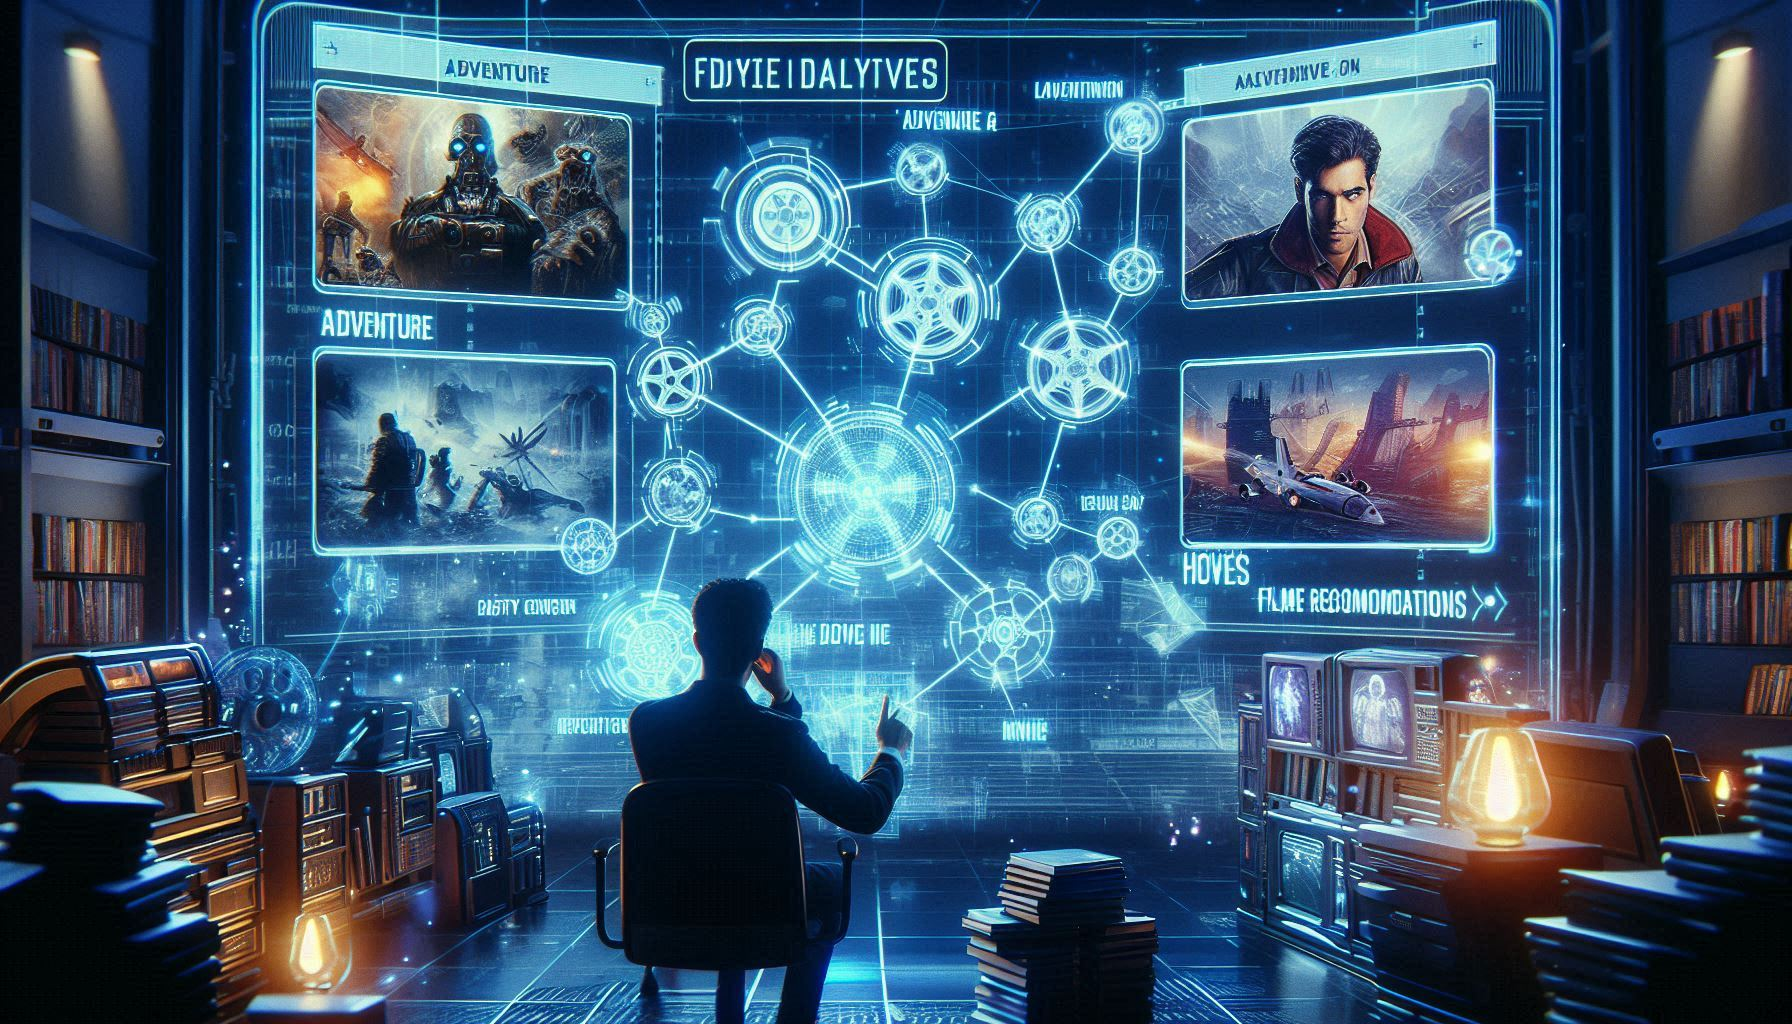

In [155]:
Image(filename='imagem.jpeg')